## In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Read th Data 

In [2]:
df=pd.read_csv('advertising.csv')
df.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [5]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

### Visual Exploration 

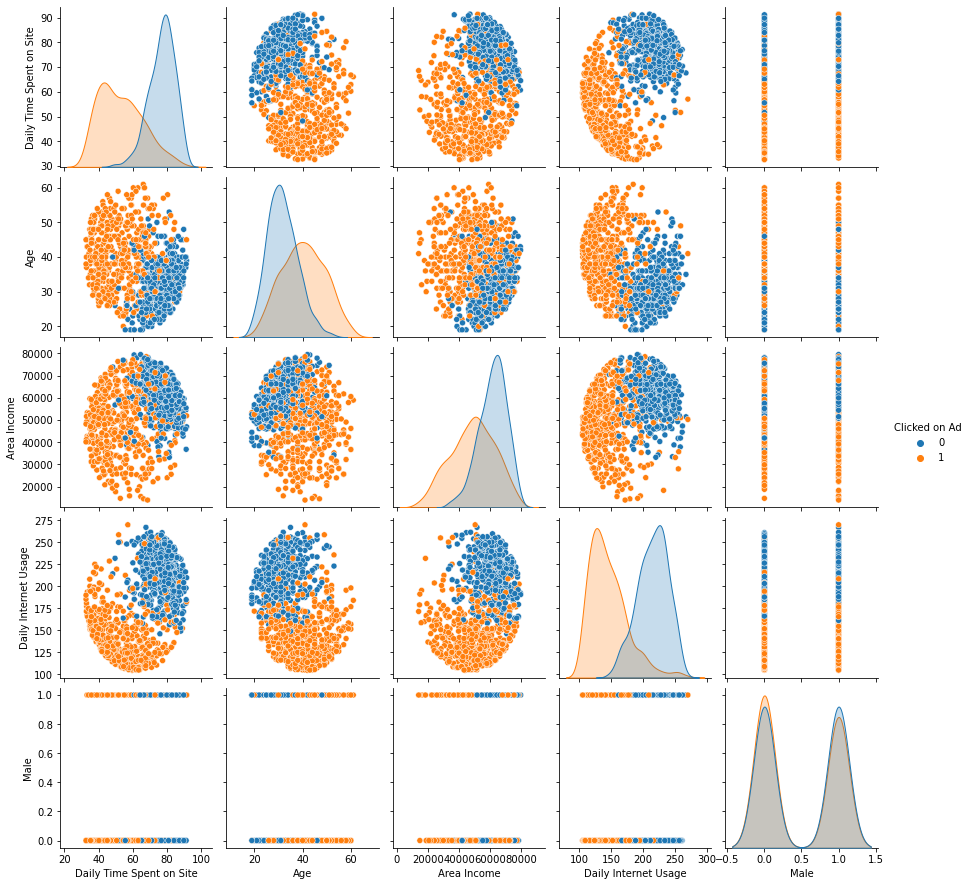

In [6]:
sns.pairplot(df, hue="Clicked on Ad")

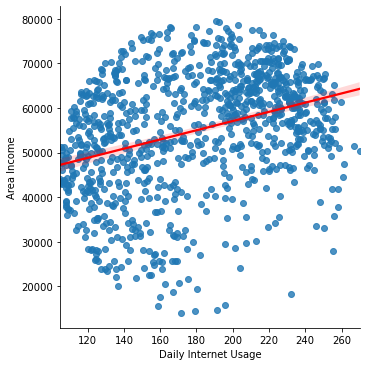

In [7]:

sns.lmplot(x='Daily Internet Usage',y='Area Income',data=df,line_kws={'color': 'red'})


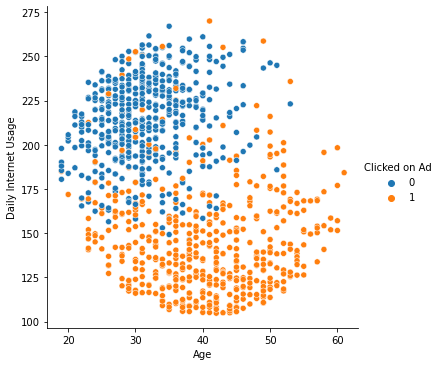

In [8]:
sns.relplot(x='Age',y='Daily Internet Usage',data=df,hue='Clicked on Ad')

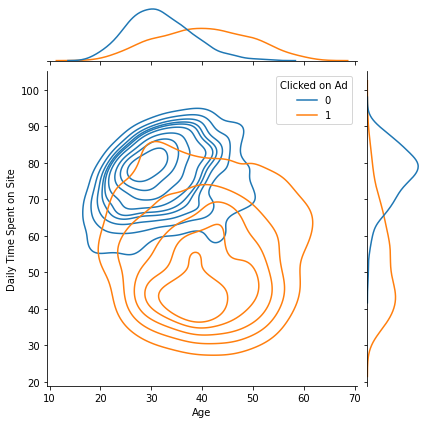

In [9]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=df,hue='Clicked on Ad',color='skyblue',kind='kde');


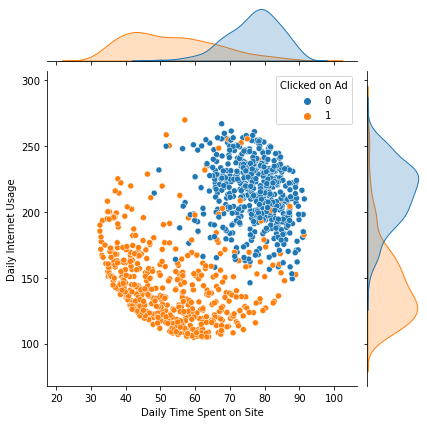

In [10]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=df,hue='Clicked on Ad',color='green')

## Logistic Regression 

### Training and Testing Data

In [11]:
from sklearn.model_selection import train_test_split
x = df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=102)

### Train and fit a logistic regression model on the training set.

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
df_lm = LogisticRegression()
df_lm.fit(x_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Predictions and Evaluations 

In [15]:
predictions = df_lm.predict(x_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix


### Print the classification report for the model.

In [17]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       141
           1       0.97      0.92      0.94       159

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [18]:
print(confusion_matrix(y_test, predictions))

[[136   5]
 [ 13 146]]


### A Function that checks whether a certain data point corresponds to clicking on Ad or not.

In [ ]:
def Click_check(will_click):
      pred = df_lm.predict(will_click)
      print(pred)

      if pred == 0:
            print('No,you will not click on the Ad !' )
      else:
            print('Yes, you will click on the Ad !')
            

In [ ]:
print("Enter data in this form: 'Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male' ")
will_click=[]
for i in range(5):
    li=float(input())
    will_click.append(li)

Enter data in this form: 'Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male' 


In [24]:
will_click = [[78,42,65470,218,1]]
Click_check(will_click)

[1]
Yes, you will click on the Ad !
